In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# System of ODEs
def system_of_odes(t, y, theta):
    E, L, P, A = y
    #Lambda    =   20
    #alphae    =   7/3
    #alphal    =   11/14
    #alphap    =   5/14
    #deltamax  =   np.log(2)
    #deltamin  =   0.45        #np.log(2)/26
    #gammamax  =   4*np.log(2)*14
    #gammamin  =   np.log(2)
    #k        =   11
    mu_ea, mu_el, mu_la, mu_pa, alphae, alphal, alphap, Lambda, k, deltamin, gammamin, deltamax, gammamax = theta
    dE_dt = Lambda * A - mu_ea * E * A - mu_el * L * E - alphae * E
    dL_dt = alphae * E + (- mu_la * A - alphal - gammamax * np.exp(-k* mu_el * E)-gammamin) * L
    dP_dt = alphal * L - mu_pa * A * P - alphap * P
    dA_dt = alphap * P - (deltamax * np.exp(-k * (mu_ea * E + mu_la * L + mu_pa * P)) + deltamin) * A
    return [dE_dt, dL_dt, dP_dt, dA_dt]



# Function to solve the ODEs given initial conditions and parameters
def solve_odes(t, P0, theta):
    sol = solve_ivp(system_of_odes, [t[0], t[-1]], P0, args=(theta,), t_eval=t)
    return sol.y

# Function to compute the residuals for fitting
def residuals(t, L_data, P_data, A_data, P0, theta):
    E_sim, L_sim, P_sim, A_sim = solve_odes(t, P0, theta)
    res = np.concatenate((L_sim - L_data, P_sim - P_data, A_sim - A_data))
    return res

# Data
t_data = np.linspace(0, 17, 18)
L_data = [0,346.25,331,127.75,79.5,104.25,123.25,65.5,59.5,131.5,105.75,57,61.25,204.25,155.5,72,75,228.5]
P_data = [0,0,267.5,72.5,36.25,9.75,4.25,0,0,3,2,1.25,.75,9.25,4,1,1.25,14.75]
A_data = [19.25,19.25,158,536.5,474.25,401.5,301,294.5,235.75,230.5,209.5,208.5,150.5,145.25,112.5,109.25,98.5,90]

# Initial guesses for parameters and initial conditions
theta_guess = [0.0001, 0.0001, 0.00001, 0.00001,0.4,0.5,0.7,20, 11, 0.0001, 0.0001, 0.0001, 0.0001]
P0_guess = [0.0, L_data[0], P_data[0], A_data[0]]
param_bounds = ([0.0, 0.0, 0.0, 0.0, 0.0 , 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ], [5.0, 5.0, 5.0, 5.0, 14, 14, 14, 300, 20, 5.0, 5.0, 10.0, 10.0])

# Fit the model to the data
params, cov = curve_fit(lambda t, mu_ea, mu_el, mu_la, mu_pa, alphae, alphal, alphap, Lambda, k, deltamin, gammamin, deltamax, gammamax:
                        residuals(t, L_data, P_data, A_data, P0_guess,
                         (mu_ea, mu_el, mu_la, mu_pa, alphae, alphal, alphap, Lambda, k, deltamin, gammamin, deltamax, gammamax)),
                        t_data, np.zeros(len(t_data) * 3), p0=theta_guess, bounds=param_bounds)

# Extract fitted parameters
a_fit, b_fit, c_fit, d_fit, e_fit, f_fit, g_fit, h_fit, i_fit, j_fit, k_fit, l_fit, m_fit = params

# Solve ODEs with fitted parameters
P_fit = solve_odes(t_data, P0_guess, (a_fit, b_fit, c_fit, d_fit, e_fit, f_fit, g_fit, h_fit, i_fit, j_fit, k_fit, l_fit, m_fit))



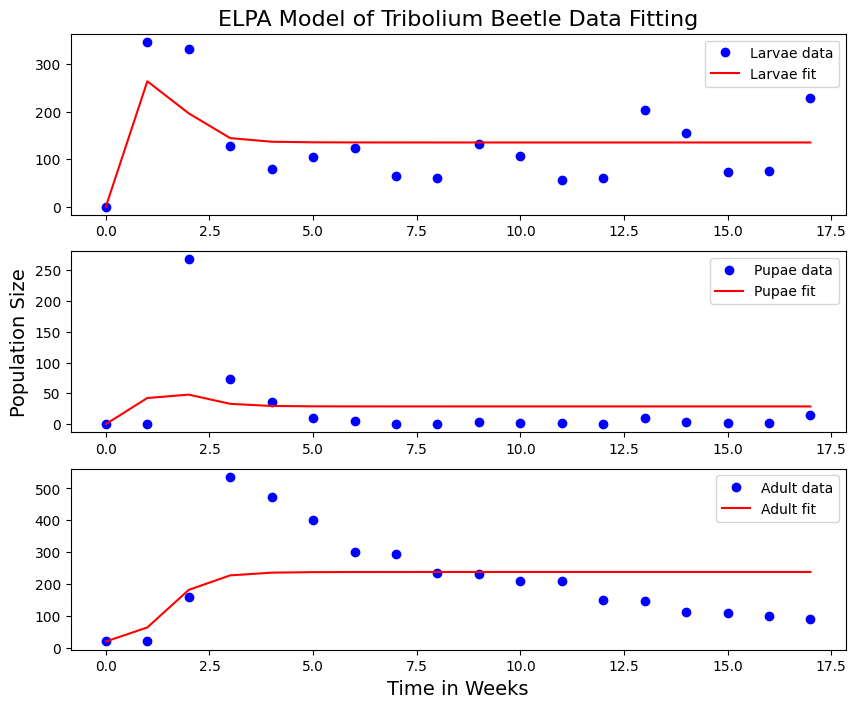

In [6]:
# Plot the results
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(t_data, L_data, 'bo', label='Larvae data')
plt.plot(t_data, P_fit[1], 'r-', label='Larvae fit')


plt.title('ELPA Model of Tribolium Beetle Data Fitting', fontsize=16)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t_data, P_data, 'bo', label='Pupae data')
plt.plot(t_data, P_fit[2], 'r-', label='Pupae fit')

plt.ylabel('Population Size', fontsize=14)

plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t_data, A_data, 'bo', label='Adult data')
plt.plot(t_data, P_fit[3], 'r-', label='Adult fit')
plt.xlabel('Time in Weeks', fontsize=14)

plt.legend()


plt.show()

In [7]:
# Print fitted parameters
a_fit, b_fit, c_fit, d_fit, e_fit, f_fit, g_fit, h_fit, i_fit, j_fit, k_fit, l_fit, m_fit = params


print("Fitted parameters:")
print(f"mu_ea = {a_fit}")
print(f"mu_el = {b_fit}")
print(f"mu_la = {c_fit}")
print(f"mu_pa = {d_fit}")
print(f"alphae = {e_fit}")
print(f"alphal = {f_fit}")
print(f"alphap = {g_fit}")
print(f"Lambda = {h_fit}")
print(f"k = {i_fit}")
print(f"deltamin = {j_fit}")
print(f"gammamin = {k_fit}")
print(f"deltamax = {l_fit}")
print(f"gammamax = {m_fit}")

Fitted parameters:
mu_ea = 0.3326978270409998
mu_el = 0.0009121610090837556
mu_la = 0.01607694771427656
mu_pa = 1.1950962609917184e-05
alphae = 1.7907795296191031
alphal = 0.7009408951703034
alphap = 3.294480569306204
Lambda = 116.24515987366019
k = 19.827208149496887
deltamin = 0.3976606448162235
gammamin = 0.004150447164978201
deltamax = 6.933153101791994
gammamax = 1.2670035194522904
